### Edgar Moises Hernandez-Gonzalez
#### 30/04/20
#### Imagen de STFT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import cv2

In [2]:
canalC4 = pd.read_csv("MeCa01ACLL-01.csv", header=None).iloc[1, 24192:25536]

In [3]:
canalC4.shape

(1344,)

(1344,)


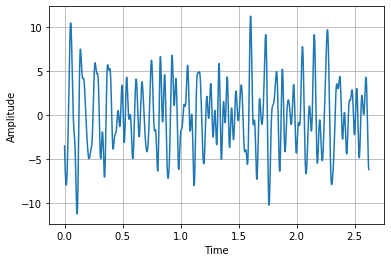

In [4]:
fs = 512
time = np.arange(0, 2.625, 1/fs)
sig = canalC4
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

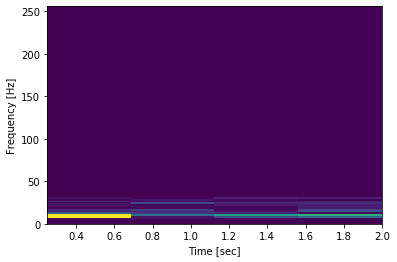

In [5]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

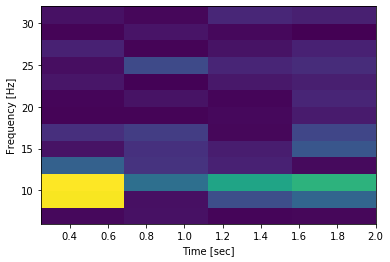

In [6]:
# Espectrograma con spectrogram, STFFT (Zoom)
plt.pcolormesh(t, f, Sxx)
plt.axis([0.25, 2, 6, 32])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

STFFT
(11, 5)


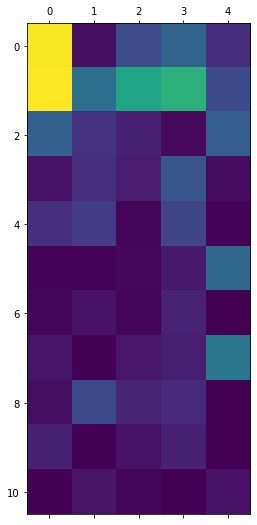

In [7]:
print("STFFT")
x = Sxx[4:15, :]
print(x.shape)
plt.matshow(x)
plt.show()

(6, 10)


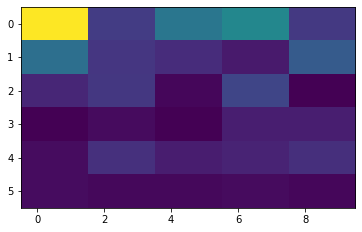

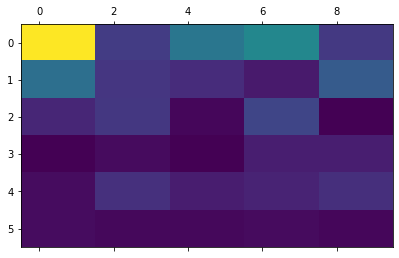

In [8]:
dim = (10, 6) #ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()